In [86]:
# Cleaned up code for parsing by vessel type logicals 9-17-24
#  comment out section for 'metric1' and 'metric2' to handle 2 vars at a time
# Then plotting boxplots for each type for 2 groups

#  updated 9-21-24 - added generic for 'metric' and vessel info (not implemented on vesselType yet)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional for statistics
from scipy import stats

# Load the CSV file
#pathname = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/scripts/matlab-copy/August 2024/'
pathname = '/Users/jcoleman/Documents/GitHub/NMCoop_Shared/#Pizzi/' #Data1_output1b_transii.csv
filename = 'Data1_output1b_transii.csv' #tidy format CSV
df = pd.read_csv(pathname+filename)

df['group'] = df['group'].map({'A': 'rmTBI', 'B': 'Sham'})

# print(df['filename'])
print(df['rowID'])
print(df['group'])
# Basic analysis: means, std, etc.
#group_means = df.groupby('group')['meanFWHM'].mean()

0       ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_01
1       ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_02
2       ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_03
3       ZT10_16X6x_gg_800nm_m5_roi2_00003_ROIs_classA_04
4       ZT10_16X6x_gg_800nm_m6_roi1_00001_ROIs_classA_01
                             ...                        
187    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_14
188    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_15
189    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_16
190    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_17
191    ZT10_16X6x_gg_800nm_m16_roi1_00001_ROIs_classA_18
Name: rowID, Length: 192, dtype: object
0      rmTBI
1      rmTBI
2      rmTBI
3      rmTBI
4      rmTBI
       ...  
187     Sham
188     Sham
189     Sham
190     Sham
191     Sham
Name: group, Length: 192, dtype: object


In [87]:
# function new - new df for box plots etc

# 9-19-24 note - THIS COULD BE TIDY IMPORT
import pandas as pd
import numpy as np

# Pick some columns/values to plot
metric1='meanFWHM'
metric2='meanFeFv'
metric3='stdevFWHM'
metric4='stdevFeFv'

# category = 'vessel_type'
category = 'cap_position'

# make a new dataframe for x='group', y=metric1, hue='vessel_type', data=final_df,
new_df = df.copy([[metric1, metric2, metric3, metric4, 'group']])

# Assuming 'df' and 'new_df' already exist
# Create the new 'vessel_type' column
new_df[category] = np.select(
    [
        df['preCapLogical'] == True,
        df['midCapLogical'] == True,
        df['pstCapLogical'] == True
    ],
    [
        'pre-cap',
        'mid-cap',
        'post-cap'
    ],
        default='unknown'
)

# print(new_df.head())
# print(new_df['vessel_type'])

# new_df = new_df.copy([(df['preCapLogical'] == True) | 
#                 (df['midCapLogical'] == True) | 
#                 (df['pstCapLogical'] == True)])

# new_df['vessel_type'] = np.select(
#     [
#         df['preCapLogical'] == True,
#         df['midCapLogical'] == True,
#         df['pstCapLogical'] == True
#     ],
#     [
#         'pre-cap',
#         'mid-cap',
#         'post-cap'
#     ])

new_df[category] = new_df[category].astype(str)
new_df = new_df[new_df[category] != 'unknown']

# Remove rows with NaN values - NOT WORKING
# df_clean = new_df[new_df['vessel_type'] != 5]
# print(df_clean[df_clean['vessel_type'] != 0])

# df_clean = new_df.copy()
df_clean = new_df.copy().dropna()

# df_clean = df_clean.drop(index=187, inplace=True)
print(df_clean[category])
# print(df_clean['vessel_type'][187])
print(new_df[category])


# print(f"x/\nRemoved {len(new_df) - len(df_clean)} rows with 0 values")
# df_clean = df_clean1.dropna()
print(f"\nRemoved {len(new_df) - len(df_clean)} rows with NaN values")

# df_clean = df_clean[df_clean['vessel_type'] != 0]
# print(new_df['rowID'])


# df_clean = df_clean[df_clean['vessel_type'] != 0]
# print(f"\nRemoved {len(df_clean) - len(df_clean)} rows with 0 values")

# print(df_clean.head())
# print(df_clean['vessel_type'][187])

# # print(new_df['meanFWHM'])
# print(new_df['group'])


# create new column in 'new_df' for 'vessel_type' with string category 'capillary', 'venule', or 'arteriole' based on
#   corresponding logicals from 'capLogical', 'venLogical, 'artLogical' columns in 'df'



# print(new_df['vessel_type'])
# print(df_clean['vessel_type'].dtype)




0       mid-cap
1       pre-cap
2       mid-cap
3       pre-cap
4       mid-cap
         ...   
185     mid-cap
188    post-cap
189     mid-cap
190     mid-cap
191    post-cap
Name: cap_position, Length: 158, dtype: object
0       mid-cap
1       pre-cap
2       mid-cap
3       pre-cap
4       mid-cap
         ...   
185     mid-cap
188    post-cap
189     mid-cap
190     mid-cap
191    post-cap
Name: cap_position, Length: 160, dtype: object

Removed 2 rows with NaN values


In [92]:
# NEW _ KEEP _ 9-21-24

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# with columns 'group', 'vessel_type', and 'meanFWHM'
# metric2
metric_choice = metric2
print(f"Data source: ")
print(f"{metric_choice}")

# # Remove rows with NaN values
# df_clean = new_df.dropna()
# print(f"\nRemoved {len(df) - len(df_clean)} rows with NaN values")

# 1. Descriptive Statistics
print(df_clean.groupby(['group', category])[metric_choice].describe())

# 2. Normality Test (Shapiro-Wilk test)
for group in df_clean['group'].unique():
    for vessel in df_clean[category].unique():
        data = df_clean[(df_clean['group'] == group) & (df_clean[category] == vessel)][metric_choice]
        stat, p = stats.shapiro(data)
        print(f'Shapiro-Wilk test for {group}, {vessel}: statistic={stat:.4f}, p-value={p:.4f}')

# 3. Two-way ANOVA (using scipy)
groups = df_clean['group'].unique()
vessel_types = df_clean[category].unique()

f_val, p_val = stats.f_oneway(*[df_clean[df_clean['group'] == group][metric_choice] for group in groups])
print("\nOne-way ANOVA for groups:")
print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")

f_val, p_val = stats.f_oneway(*[df_clean[df_clean[category] == vt][metric_choice] for vt in vessel_types])
print("\nOne-way ANOVA for vessel types:")
print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")

# 4. Non-parametric alternative: Kruskal-Wallis H-test
kruskal_group = stats.kruskal(*[group[metric_choice].values for name, group in df_clean.groupby('group')])
kruskal_vessel = stats.kruskal(*[group[metric_choice].values for name, group in df_clean.groupby(category)])

print("\nKruskal-Wallis H-test results:")
print(f"Group effect: statistic={kruskal_group.statistic:.4f}, p-value={kruskal_group.pvalue:.4f}")
print(f"Vessel type effect: statistic={kruskal_vessel.statistic:.4f}, p-value={kruskal_vessel.pvalue:.4f}")

# 5. Post-hoc test: Dunn's test (as an alternative to Tukey's HSD)
from scipy.stats import rankdata
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def dunn_test(data, groups):
    ranks = rankdata(data)
    k = len(np.unique(groups))
    n = len(data)
    
    # Calculate rank sums for each group
    rank_sums = [np.sum(ranks[groups == g]) for g in np.unique(groups)]
    
    # Calculate test statistic
    H = (12 / (n * (n + 1))) * np.sum([(r ** 2) / ng for r, ng in zip(rank_sums, [np.sum(groups == g) for g in np.unique(groups)])])
    H = H - 3 * (n + 1)
    
    df = k - 1
    p_value = 1 - stats.chi2.cdf(H, df)
    
    return H, p_value

print("\nDunn's test results:")
H, p = dunn_test(df_clean[metric_choice], df_clean['group'] + df_clean[category])
print(f"H-statistic: {H:.4f}, p-value: {p:.4f}")

# Save stats to TXT file
stats2txt_filename = metric_choice + ' 1way_anovas by Group- ' + category + '_092124.txt'
with open(stats2txt_filename, 'w') as f:
    f.write("Data source:\n")
    f.write(f"{metric_choice}\n")
    f.write("Removed rows with NaN values:\n")
    f.write(f"{len(df) - len(df_clean)}\n\n")

    f.write("Descriptive Statistics:\n")
    f.write(df_clean.groupby(['group', category])[metric_choice].describe().to_string() + "\n\n")

    f.write("Normality Test (Shapiro-Wilk test):\n")
    for group in df_clean['group'].unique():
        for vessel in df_clean[category].unique():
            data = df_clean[(df_clean['group'] == group) & (df_clean[category] == vessel)][metric_choice]
            stat, p = stats.shapiro(data)
            f.write(f'Shapiro-Wilk test for {group}, {vessel}: statistic={stat:.4f}, p-value={p:.4f}\n')

    f.write("\nOne-way ANOVA for groups:\n")
    f.write(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}\n\n")

    f.write(f"One-way ANOVA for {category}:\n")
    f.write(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}\n\n")

    f.write("Kruskal-Wallis H-test results:\n")
    f.write(f"Group effect: statistic={kruskal_group.statistic:.4f}, p-value={kruskal_group.pvalue:.4f}\n")
    f.write(f"Vessel type effect: statistic={kruskal_vessel.statistic:.4f}, p-value={kruskal_vessel.pvalue:.4f}\n\n")

    f.write("Dunn's test results:\n")
    f.write(f"H-statistic: {H:.4f}, p-value: {p:.4f}\n")


Data source: 
meanFeFv
                    count      mean       std       min       25%       50%  \
group cap_position                                                            
Sham  mid-cap        38.0  0.864780  0.494613  0.240384  0.523809  0.741273   
      post-cap       10.0  0.883800  0.734000  0.123071  0.431110  0.678734   
      pre-cap         8.0  1.036013  0.503308  0.308046  0.759562  1.046169   
rmTBI mid-cap        51.0  0.814518  0.542572  0.083048  0.404864  0.691942   
      post-cap       30.0  1.115912  0.779215  0.173800  0.575781  0.874058   
      pre-cap        21.0  0.658074  0.400740  0.140124  0.416809  0.660262   

                         75%       max  
group cap_position                      
Sham  mid-cap       1.020761  2.095833  
      post-cap      1.049822  2.694953  
      pre-cap       1.202398  1.897262  
rmTBI mid-cap       1.062506  2.441968  
      post-cap      1.328707  3.095309  
      pre-cap       0.754944  1.716540  
Shapiro-Wilk tes

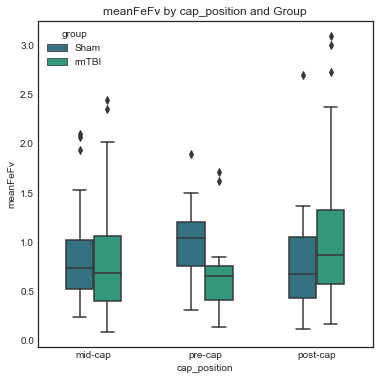

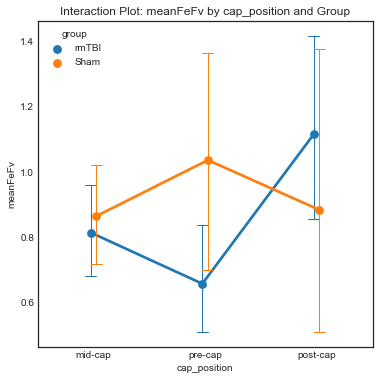

In [93]:
# 6. Visualization

# metric_choice = metric1

plt.figure(figsize=(6, 6))

viridis_palette = sns.color_palette('viridis', 4)[1:4]  # Select 3 contrasting colors

sns.boxplot(x=category, y=metric_choice, hue='group', data=df_clean,
              width=0.5, dodge=True, palette=viridis_palette, hue_order=['Sham', 'rmTBI'])
# sns.boxplot(x='group', y=metric_choice, hue='vessel_type', data=new_df, 
#             width=0.4,  # Adjust boxplot width (~50-70% of original)
#             dodge=True,  # Add gap between vessel types
#             palette=viridis_palette,
#             order=['Sham', 'rmTBI']) 
plt.title(metric_choice + ' by ' + category + ' and Group')

# Save plot as PDF
figure_filename = metric_choice + ' Distribution by Group-' + category + '_092124'
plt.savefig(figure_filename + '.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.style.use("seaborn-white")
plt.show()

# 7. Interaction plot - adapt for above code
""""
sns.pointplot() creates a point plot, displaying:

Means: Average values for each group.
Error bars: Confidence intervals (CIs) for the means.

Parameters:
x='vessel_type': X-axis represents vessel types.
y=metric_choice: Y-axis represents the chosen metric.
hue='group': Color hue represents groups (rmTBI and Sham).
data=df_clean: Data source is the cleaned DataFrame.
dodge=True: Groups are displayed side-by-side (dodged).
ci=68: Error bars represent 68% confidence intervals.

Interpretation:
Points represent group means.
Error bars indicate variability and uncertainty.
Overlapping error bars suggest no significant difference.

Customization:
Change ci value for different confidence levels (e.g., ci=95).
Use capsize to adjust error bar cap size.
Add scale to adjust point size.
"""
plt.figure(figsize=(6, 6))
sns.pointplot(x=category, y=metric_choice, hue='group', data=df_clean, dodge=True,
              ci=95, errwidth=1, capsize=0.1)
# sns.pointplot(x='vessel_type', y=metric_choice, hue='group', data=df_clean,
#               dodge=True, ci='sem', errwidth=1, capsize=0.2)
plt.title('Interaction Plot: ' + metric_choice + ' by ' + category + ' and Group')
plt.show()


In [91]:
import numpy as np
import scipy

print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")

# Add this after the data validation section
print("\nNumber of values in each category:")
value_counts = new_df.groupby(['group', category]).size().unstack(fill_value=0)
print(value_counts)

# Optionally, you can save this to a CSV file
value_counts.to_csv(category + '_bygroup_counts.csv')

NumPy version: 1.26.4
SciPy version: 1.13.1

Number of values in each category:
cap_position  mid-cap  post-cap  pre-cap
group                                   
Sham               38        11        8
rmTBI              51        31       21


In [ ]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])
                        
# fig = plt.figure(figsize=(15, 13))
# bp = sns.boxplot(#insert data and everything)
# adjust_box_widths(fig, 0.9)